
# Data Initial Analysis
## Table of Content:
### [Quesiton 1](#question-1)
Load the dataset and provide summary statistics for the asset returns for each series (date of first observation, number of observations, mean, standard deviation, etc.).
### [Question 2](#question-2)
Calculate a “commodity market factor” as the equally weighted average of all commodities in the set.
### [Further analysis of the dataset](#question-3)
- [Cumulative returns computation](#cumret)
- [Plot all the assets](#plot-assets)

<a id="question-1"></a>
### <font color='red'>Question 1</font>
Load the dataset and provide summary statistics for the asset returns for each series (date of first observation, number of observations, mean, standard deviation, etc.).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import helper
# import ai_agent

### Excess returns loading and processing

In [3]:
# Load data
raw_excess_returns = pd.read_excel('data.xlsx', sheet_name='Return Indices')

# Set 'Dates' column as index
raw_excess_returns.set_index('Dates', inplace=True)

# Replace consecutive spaces with underscores in column names
raw_excess_returns.columns = raw_excess_returns.columns.str.replace(r'\s+', '_').str.upper()

# Convert the index to datetime
raw_excess_returns.index = pd.to_datetime(raw_excess_returns.index)

# divide by 100 returns
raw_excess_returns = raw_excess_returns.div(100)-1

# # Mean imputation: Calculate the mean value of each asset's 
# # returns and replace the NaN values with these computed values. 
# # This approach assumes that the missing values are similar to the overall average behavior.
# mean_returns = raw_excess_returns.mean()

# # Fill NaN values with mean returns
# raw_excess_returns = raw_excess_returns.fillna(mean_returns)  

raw_excess_returns = raw_excess_returns.fillna(0)  

assets_list = raw_excess_returns.columns.values

<ipython-input-3-042604cf9092>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_excess_returns.columns = raw_excess_returns.columns.str.replace(r'\s+', '_').str.upper()


In [5]:
raw_excess_returns.describe()

,LIVE_CATTLE_FUTR_AUG23,LEAN_HOGS_FUTURE_JUL23,COFFEE_'C'_FUTURE_JUL23,CORN_FUTURE_JUL23,COTTON_NO.2_FUTR_JUL23,SOYBEAN_FUTURE_JUL23,SUGAR_#11_(WORLD)_JUL23,WHEAT_FUTURE(CBT)_JUL23,BRENT_CRUDE_FUTR_JUL23,COPPER_FUTURE_JUL23,...,SILVER_FUTURE_JUL23,PLATINUM_FUTURE_JUL23,WTI_CRUDE_FUTURE_JUN23,LME_NICKEL,LME_COPPER,LME_ALUMINIUM,LME_LEAD,LME_ZINC,COCOA_FUTURE_JUL23,HEATING_OIL
count,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,...,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000
mean,7.730154,0.172334,1.591461,-0.158074,0.289587,0.946442,-0.409583,0.632786,7.194608,0.662958,...,-0.425315,0.582419,3.343367,2.890345,1.374603,0.140313,1.269269,0.061562,2.086510,7.849631
std,4.415486,0.855352,2.353051,0.678873,0.854314,0.947621,1.252101,1.415866,9.331480,1.023711,...,0.560558,0.934212,4.611108,3.251360,1.756150,0.266865,1.686261,0.402006,3.874765,9.270250
min,-0.012534,-0.938924,-0.778617,-0.902779,-0.761063,-0.336313,-0.965232,-0.889917,-0.275591,-0.356790,...,-0.882988,-0.344844,-3.381587,-0.047016,-0.112558,-0.317705,-0.178631,-0.546951,-0.609616,-0.139903
25%,3.093924,-0.608451,-0.050997,-0.742242,-0.395689,0.141516,-0.924231,-0.497090,0.000000,0.000000,...,-0.786042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.231707,-0.171151,0.000000
50%,8.703686,0.000000,0.365359,-0.273434,-0.070165,0.654747,-0.891214,0.406603,1.593176,0.000000,...,-0.616512,0.000000,1.180497,2.053966,0.473957,0.000000,0.291041,0.000000,0.208071,3.041363
75%,11.195965,0.576216,3.130802,0.157275,0.952653,1.716610,-0.565425,1.305157,12.494751,1.409693,...,-0.067307,1.065541,4.450333,4.710343,2.964071,0.241311,3.040067,0.189024,2.544648,14.354015
max,16.125337,2.828472,13.067098,2.300101,3.270801,4.402825,13.987572,7.172409,48.115486,3.687107,...,5.486000,4.455760,27.236826,20.095666,6.277066,1.523934,7.658876,1.753049,19.058958,44.744526


### Assets loading and processing

In [4]:
assets = pd.read_excel('data.xlsx', sheet_name='Assets')
# Set 'Commodity' column as index
assets.set_index('Commodity', inplace=True)

assets.head()

,Sector
Commodity,
LIVE CATTLE,Agri & livestock
LEAN HOGS,Agri & livestock
COFFEE 'C',Agri & livestock
CORN,Agri & livestock
COTTON NO.2,Agri & livestock


In [5]:
print(np.unique(assets.values))

['Agri & livestock' 'Energy' 'Metals']


<a id="question-2"></a>
### <font color='red'>Question 2</font>
Calculate a “commodity market factor” as the equally weighted average of all commodities in the set.

In [6]:
commodity_market_factor = raw_excess_returns.mean(axis=1)
# Add the 'commodity_market_factor' column to the DataFrame
raw_excess_returns = raw_excess_returns.assign(commodity_market_factor=commodity_market_factor)
# raw_excess_returns['commodity_market_factor'].head()

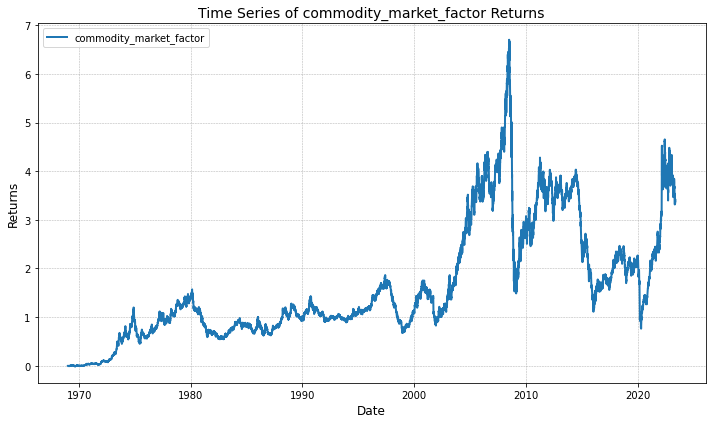

In [7]:
helper.plot_ticker(raw_excess_returns, 'commodity_market_factor')

<a id="question-3"></a>
### <font color='red'>Further analysis of the dataset</font>

#### <a id="cumret"></a>Cumulative log returns: from product to sum.

In [8]:
_df = raw_excess_returns.copy()

# _asset = 'LIVE_CATTLE_FUTR_AUG23'
_asset = 'LEAN_HOGS_FUTURE_JUL23'
_df['exc_ret'] = raw_excess_returns[_asset]
_df['cum_ret'] = (1 + raw_excess_returns[_asset]).cumprod() - 1
_df['log_ret'] = np.log(1+raw_excess_returns[_asset])
_df['cum_log_ret'] = _df['log_ret'].cumsum()-1

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


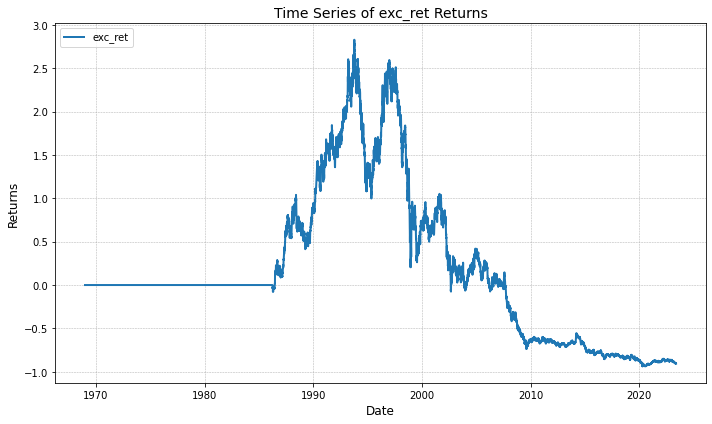

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


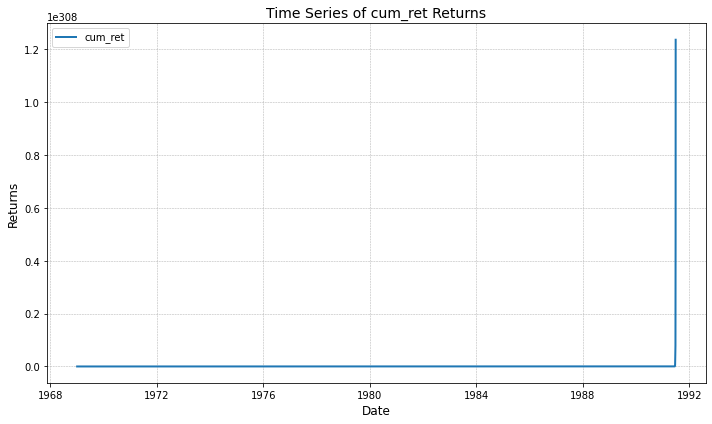

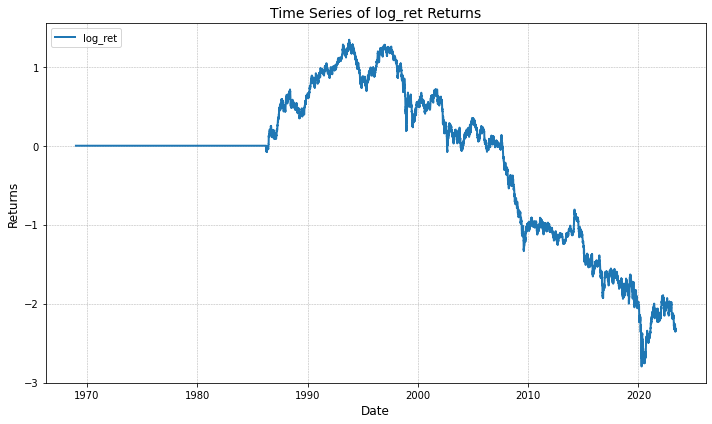

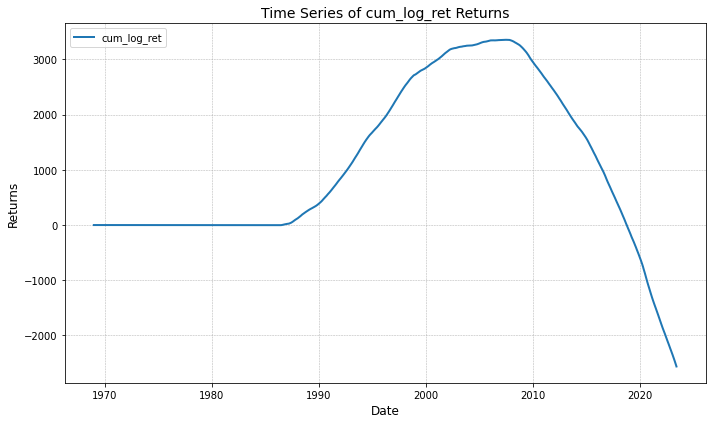

In [9]:
helper.plot_ticker(_df, 'exc_ret')
helper.plot_ticker(_df, 'cum_ret')
helper.plot_ticker(_df, 'log_ret')
helper.plot_ticker(_df, 'cum_log_ret')


From the graphs and the RuntimeWarning overflow, it can be seen that computations with returns are not ideal because of overflow. In fact, we can clearly see that the cumulative returns tend to infinity before the year 1992. Hence, we calculate log returns and obtain better results due to the fact that **we transformed a product into a sum**.

<a id="plot-assets"></a>
#### Plot the assets
By plotting the assets, one can get a global insight of the excess returns fluctuations. The goal here is to get some intuition and maybe for the more experienced to spot some trends / seasonalities.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


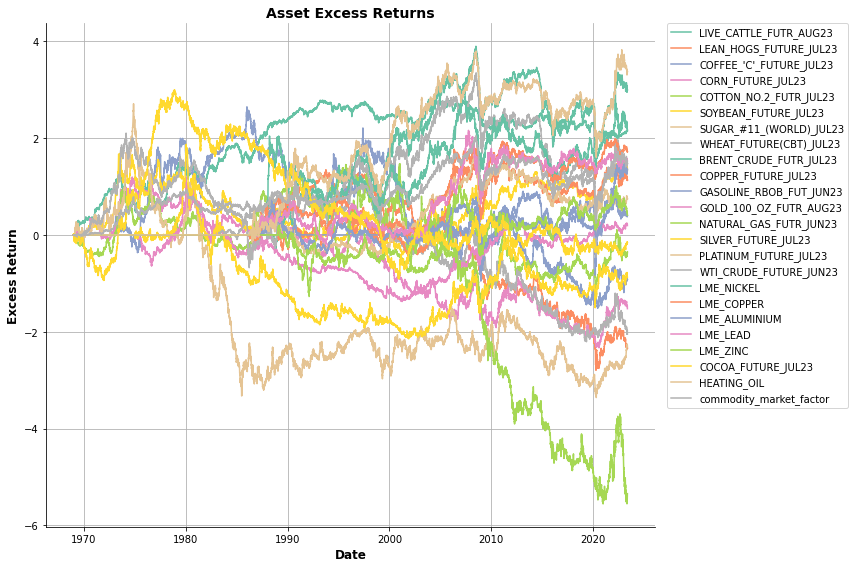

In [10]:
excess_returns = np.log(1+raw_excess_returns)
helper.plot_df(excess_returns)